# Задача 3

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Загрузим изображения

In [31]:
x = np.loadtxt('hard_train.txt', dtype=int)
print(x)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [32]:
x.shape

(200000, 784)

Убедимся, что это действительно цифры

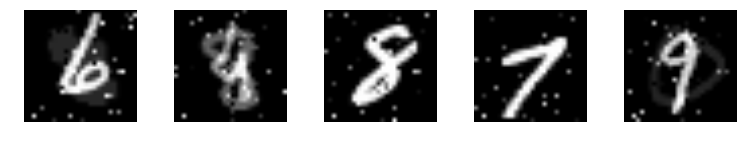

In [58]:
plt.figure(figsize=(13, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

Нам надо только шесть тысяч для этого задания

In [60]:
x_train = x[:6000]
x_train.shape

(6000, 784)

Применим t-SNE

In [16]:
model = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)

In [62]:
y = model.fit_transform(x_train)

Загрузим, какие цифры изображены на картинках

In [74]:
x_labels = np.loadtxt('hard_train_labels.txt', dtype=int)
x_train_labels = x_labels[:6000]

Визуализируем двумерный массив, полученный из исходного 28*28-мерного

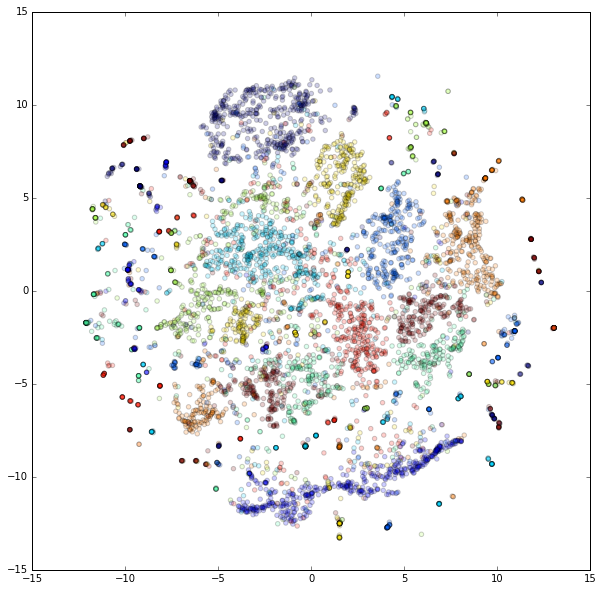

In [92]:
plt.figure(figsize=(10, 10))
plt.scatter(y[:, 0], y[:, 1], c=x_train_labels, alpha=0.2)
plt.show()

Разобьем данные на train и test, чтобы применить kNN

In [82]:
train = y[:5000]
test = y[5000:6000]

train_labels = x_train_labels[:5000]
test_labels = x_train_labels[5000:6000]

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Попробуем запустить kNN с различным количеством соседей

In [91]:
for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    model.fit(train, train_labels)
    print(k, ':', accuracy_score(test_labels, model.predict(test)))

1 : 0.829
2 : 0.821
3 : 0.845
4 : 0.838
5 : 0.847
6 : 0.842
7 : 0.844
8 : 0.843
9 : 0.839
10 : 0.84
11 : 0.841
12 : 0.84
13 : 0.832
14 : 0.832
15 : 0.834
16 : 0.834
17 : 0.835
18 : 0.831
19 : 0.832
20 : 0.83
21 : 0.83
22 : 0.825
23 : 0.821
24 : 0.816
25 : 0.812
26 : 0.81
27 : 0.809
28 : 0.806
29 : 0.802


Как видим, наилучший результат -- 84.7% успеха получается при количестве соседей k = 5.